# Introduction to python for hydrologists &mdash; file input and output

In this exercise we will be learning about using python to work with file input and output. We will also learn a little about reading and writing formatted ascii files, binary files, and retrieving data from the web to creat plots and data files. 

### Initialization of Notebook

Populate the interactive namespace with the python packages we will be using in this exercise

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt

import pygeohydro as gh
from pygeohydro import NWIS

# set up the path to our data
pthnb = os.path.join('..', 'data', 'fileio')
if not os.path.exists(pthnb):
    os.makedirs(pthnb)

### Additional reading and supporting documentation

http://openbookproject.net/thinkcs/python/english3e/files.html

### About files
While a program is running, its data is stored in random access memory (RAM). RAM is fast and inexpensive, but it is also **volatile**, which means that when the program ends, or the computer shuts down, data in RAM disappears. To make data available the next time the computer is turned on and the program is started, it has to be written to a non-volatile storage medium, such a hard drive, usb drive, or CD-RW.

Data on **non-volatile** storage media is stored in named locations on the media called **files**. By reading and writing files, programs can save information between program runs.

Working with files is a lot like working with a notebook. To use a notebook, it has to be opened. When done, it has to be closed. While the notebook is open, it can either be read from or written to. In either case, the notebook holder knows where they are. They can read the whole notebook in its natural order or they can skip around.

All of this applies to files as well. To open a file, we specify its name and indicate whether we want to read or write.

### Writing our first file
Let’s begin with a simple program that writes three lines of text into a file:

In [2]:
fname = os.path.join(pthnb,'test.txt')
myfile = open(fname, 'w')
myfile.write('My first file written from Python\n')
myfile.write('---------------------------------\n')
myfile.write('Hello, world!\n')
myfile.close()

Opening a file creates what we call a file **handle**. In this example, the variable myfile refers to the new handle object. Our program calls methods on the handle, and this makes changes to the actual file which is usually located on our disk.

On line 1, the open function takes two arguments. The first is the name of the file, and the second is the mode. Mode "w" means that we are opening the file for writing.

With mode "w", if there is no file named test.txt on the disk, it will be created. If there already is one, it will be replaced by the file we are writing.

To put data in the file we invoke the write method on the handle, shown in lines 2, 3 and 4 above. In bigger programs, lines 2–4 will usually be replaced by a loop that writes many more lines into the file.

Closing the file handle (line 5) tells the system that we are done writing and makes the disk file available for reading by other programs (or by our own program).

### A better way to write a file, with `with`.

The python `with` statement allows us to create a file handle that automatically closes after the code exits the with statement. This not only reduces the amount of code that exists, it also ensures that file handles are not not left open as the code progresses.

In [3]:
with open(fname, "w") as myfile:
    myfile.write('My first file written from Python using with!\n')
    myfile.write('---------------------------------\n')
    myfile.write('Hello, world!\n')

print(f"myfile is closed: {myfile.closed}")

myfile is closed: True


### Reading a file line-at-a-time

Now that the file exists on our disk, we can open it, this time for reading, and read all the lines in the file, one at a time. This time, the mode argument is `'r'` for reading:

We can also use the `with open() as` convention for reading files:

In [4]:
with open(fname, "r") as mynewhandle:
    while True:                          # keep reading forever
        theline = mynewhandle.readline() # try to read the next line
        if len(theline) == 0:            # if there are no more lines
            break                        # leave the loop
        # now process the line we've just read
        print(theline.rstrip())

My first file written from Python using with!
---------------------------------
Hello, world!


In bigger programs, we’d squeeze more extensive logic into the body of the loop at the `print` statement. For example, if each line of the file contained the name and email address of one of our friends, perhaps we’d split the line into some pieces and call a function to send the friend a party invitation.

We suppress the newline character (`'\n'`) in the string `theline` using `.rstrip()`. Why? 

This is because the string already has its own newline : the `readline` method in line 3 returns everything up to and including the newline character. This also explains the end-of-file detection logic: when there are no more lines to be read from the file, `readline` returns an empty string — one that does not even have a newline at the end, hence its length is 0.

See [python's string documentation](https://docs.python.org/3.9/library/string.html) for more information on common string operations.

### A second way to read file input

Instead of using the `readline()` method we can loop over the handle object read a file line by line.

In [5]:
with open(fname, "r") as myloophandle:
    for line in myloophandle:
        # process the line
        print(line.strip())

My first file written from Python using with!
---------------------------------
Hello, world!


This approach is much easier, but both methods (looping over the object and `readline()`) have applications for reading input. 

### What if we open a file that does not exist
If we try to open a file that does not exist, we get an error:

In [6]:
try:
    mynewhandle = open('wharrah.txt', 'r')
except Exception as e:
    print(e) 

[Errno 2] No such file or directory: 'wharrah.txt'


### Class Activity 1

Write and read your own file. Use the completed code blocks above as a template. **Don't be ashamed to adapt code you got from someone else or on the internet to accomplish something useful.**

In [7]:
f = os.path.join(pthnb, 'mynewfile.txt')
with open(f, "w") as foo:
    foo.write("Hello World")
    
with open(f) as foo:
    for line in foo:
        print(line.strip())

Hello World


### File paths

Files on non-volatile storage media are organized by a set of rules known as a **file system**. File systems are made up of files and **directories**, which are containers for both files and other directories.

By default, when we create a new file by opening it goes in the current directory (wherever we were when we ran the program). Similarly, when we open a file for reading, Python looks for it in the current directory. In the above example, we have used `os.path.join()` to write the file to a specific directory rather than the directory we are running this notebook from. If `'test.txt'` was used in the `open` statement, the file would have been written to the current working directory. The current working directory can be determined using:

In [8]:
os.getcwd()

'C:\\Users\\jlarsen\\Desktop\\Work\\madison_WI_2022\\notebooks\\part0_python_intro\\solutions'

Determine the directory that we wrote `'test.txt'` (`fname`) to in the blank code block below using `os.path.abspath()`:

In [9]:
os.path.abspath(fname)

'C:\\Users\\jlarsen\\Desktop\\Work\\madison_WI_2022\\notebooks\\part0_python_intro\\data\\fileio\\test.txt'

On Windows, a full path could look like `'C:\\temp\\somefile.txt'`, while on MacOSX, Linux, and Unix systems the full path could be `'/home/jimmy/somefile.txt'`. Because backslashes are used to escape things like newlines and tabs, we need to write two backslashes in a literal string to get one! So the length of these two strings is the same!

We cannot use `/` or `\` as part of a filename; they are reserved as a delimiter between directory and filenames.

`os.path` includes a number of useful methods for manipulating pathnames. For example, `os.path.normpath(path)` can be used to take Unix style paths into paths that can be used with Windows.

Take a look at https://docs.python.org/3.9/library/os.path.html for more information of `os.path` methods.

### Turning a file into a list of lines

It is often useful to fetch data from a disk file and turn it into a list of lines. Suppose we have a file containing our friends and their email addresses, one per line in the file. But we’d like the lines sorted into alphabetical order. A good plan is to read everything into a list of lines, then sort the list, then write the sorted list back to another file, and then read the sorted file and print the data from the file:

In [10]:
fname = os.path.join(pthnb, 'friends.txt')
with open(fname, 'r') as f:
    xs = f.readlines()

xs.sort()

gname = os.path.join(pthnb, 'sortedfriends.txt')
with open(gname, 'w') as g:
    for v in xs:
        g.write(v)

        
with open(gname, "r") as foo:
    for line in foo:
        print(line.strip())

Annihilator, Morbo, , morbo@futurama.org
Brannigan, Zapp, , brannigan@futurama.org
Clampazzo, Francis, X., clamps@futurama.org
Conrad, Hermes, , hermes@futurama.org
Farnsworth, Hubert, J., professor@futurama.org
Fry, Philip, J., fry@futurama.org
Kroker, Kif, , kif@futurama.org
Mousepad, Joey, , mousepad@futurama.org
Nibbler, Lord, , nibbler@fututama.org
Rodriguez, Bender, Bending, bender@futurama.org
Turanga, Leela, , leela@futurama.org
Wernstrom, Ogden, , wernstrom@futurama.org
Wong, Amy, , amy@futurama.org
Zoidberg, John, A., zoidberg@futurama.org
van Schoonhoven, Linda, , vanschoonhoven@futurama.org


### Adding data from a file to a list of select data

It is also useful to fetch data from a disk file, extracting the data from the lines read from the disk file, and add select data to a list. We will read the the names of our friends from the sorted file we just created, and add the last name, the first name and the email address to a list. We will then print the list:

In [11]:
mynewhandle = open(gname, 'r')
with open(gname, "r") as foo:
    mylist = []
    for line in foo: 
        t = line.strip().split(',')
        mylist.append([t[0].strip(), t[1].strip(), t[3].strip()])


for [ln, fn, e] in mylist:
    print(f'{ln :20s}, {fn :11s}: {e}')

Annihilator         , Morbo      : morbo@futurama.org
Brannigan           , Zapp       : brannigan@futurama.org
Clampazzo           , Francis    : clamps@futurama.org
Conrad              , Hermes     : hermes@futurama.org
Farnsworth          , Hubert     : professor@futurama.org
Fry                 , Philip     : fry@futurama.org
Kroker              , Kif        : kif@futurama.org
Mousepad            , Joey       : mousepad@futurama.org
Nibbler             , Lord       : nibbler@fututama.org
Rodriguez           , Bender     : bender@futurama.org
Turanga             , Leela      : leela@futurama.org
Wernstrom           , Ogden      : wernstrom@futurama.org
Wong                , Amy        : amy@futurama.org
Zoidberg            , John       : zoidberg@futurama.org
van Schoonhoven     , Linda      : vanschoonhoven@futurama.org


### Class Activity 2

1. What does the `split()` method do?
2. What does `fn[0]` do? What would `fn[:2]` do? What is `mylist[2]`?

Use the empty code blocks below to answer these questions. **Remember it os ok to use the internet to help figure out what's going on.**

In [12]:
t = line.split(",")
print(t)

['van Schoonhoven', ' Linda', ' ', ' vanschoonhoven@futurama.org\n']


In [13]:
print(fn[0])
print(fn[2:])
print(mylist[2])

L
nda
['Clampazzo', 'Francis', 'clamps@futurama.org']


### String format statements

“Format specifications” are used within replacement fields contained within a format string "f-string" to define how individual values are presented. They can also be passed directly to the built-in `format()` function. Each formattable type may define how the format specification is to be interpreted.

Most built-in types implement the following options for format specifications, although some of the formatting options are only supported by the numeric types.

A general convention is that an empty format string (`''`) produces the same result as if you had called `str()` on the value. A non-empty format string typically modifies the result.

**The general form of a standard format specifier is:**

* format_spec :   `[[fill]align][sign][#][0][width][,][.precision][type]`

* fill        :   `<any character> `

* align       :   `'<'.  '>'.  '='.  '^'`

* sign        :   `'+', '-', ' '` 

* width       :   `integer`

* precision   :   `integer`

* type        :  `'b', 'c', 'd', 'e', 'E', 'f', 'F', 'g', 'G', 'n', 'o', 's', 'x', 'X', ,'%'`

If a valid *align* value is specified, it can be preceded by a *fill* character that can be any character and defaults to a space if omitted. Note that it is not possible to use { and } as *fill* `char` while using the `str.format()` and "f-string" methods; this limitation however doesn’t affect the `format()` function.

**The meaning of the various alignment options is as follows:**

**Option**

* `'<'`	: Forces the field to be left-aligned within the available space (this is the default for most objects).
* `'>'`	: Forces the field to be right-aligned within the available space (this is the default for numbers).
* `'='`	: Forces the padding to be placed after the sign (if any) but before the digits. This is used for printing fields in the form ‘+000000120’. : This alignment option is only valid for numeric types.
* `'^'`	: Forces the field to be centered within the available space.

Note that unless a minimum field width is defined, the field width will always be the same size as the data to fill it, so that the alignment option has no meaning in this case.

The sign option is only valid for number types, and can be one of the following:

**Option**

* `'+'`	: indicates that a sign should be used for both positive as well as negative numbers.
* `'-'`	: indicates that a sign should be used only for negative numbers (this is the default behavior).
* `space`	: indicates that a leading space should be used on positive numbers, and a minus sign on negative numbers.

The `','` option signals the use of a comma for a thousands separator.


#### Let's look at the `str.format()` method first

A great explanation with examples for the `str.format()` and older formatting methods can be found at [pyformat](https://pyformat.info/)

Accessing arguments by position:

In [14]:
print('{0}, {1}, {2}'.format('a', 'b', 'c'))
print('{}, {}, {}'.format('a', 'b', 'c'))  # 2.7+ only
print('{2}, {1}, {0}'.format('a', 'b', 'c'))
print('{2}, {1}, {0}'.format(*'abc'))      # unpacking argument sequence
print('{0}{1}{0}'.format('abra', 'cad')) 

a, b, c
a, b, c
c, b, a
c, b, a
abracadabra


Accessing arguments by name:

In [15]:
print('Coordinates: {latitude}, {longitude}'.format(latitude='37.24N', longitude='-115.81W'))
coord = {'latitude': '37.24N', 'longitude': '-115.81W'}
print('Coordinates: {latitude}, {longitude}'.format(**coord))

Coordinates: 37.24N, -115.81W
Coordinates: 37.24N, -115.81W


In [16]:
coord = (3, 5)
print('X: {0[0]};  Y: {0[1]}'.format(coord))

X: 3;  Y: 5


#### f-strings: a better solution in most cases

f-strings are a relatively new, but powerful feature for string formatting. 

Construction of an f string is similar to the `str.format`, however we no longer need to add a `.format()` call to the end of the string. 

The call signiture for f-strings is:

```python
f"{some_variable}"
```

In [17]:
abc = "abc"
a, b, c = "abc"

In [18]:
print(f"{a}, {b}, {c}")
print(f"{c}, {a}, {b}")
print(f"{abc[0]}, {abc[1]}, {abc[2]}")

a, b, c
c, a, b
a, b, c


Aligning text and specifying a width

In [19]:
print(f"{'left aligned' :<30}")
print(f"{'right aligned' :>30}")
print(f"{'centered' :^30}")
print(f"{'centered' :*^30}") # use '*' as a fill character

left aligned                  
                 right aligned
           centered           
***********centered***********


Replacing %+f, %-f, and % f and specifying a sign:

In [20]:
print(f'{3.14 :+f}; {-3.14 :+f}')  # show it always
print(f'{3.14 : f}; {-3.14 : f}')  # show a space for positive numbers
print(f' {3.14 :-f}; {-3.14 :-f}')

+3.140000; -3.140000
 3.140000; -3.140000
 3.140000; -3.140000


Using the comma as a thousands separator:

In [21]:
print(f'{1234567890 :,}')

1,234,567,890


Expressing a percentage:

In [22]:
points = 19.5
total = 22
print(f'Correct answers: {points/total :.2%}')

Correct answers: 88.64%


Self describing formatting:

In [23]:
correct_answers = points/total
print(f"{correct_answers= :.2%}")

correct_answers= 88.64%


Using type-specific formatting:

In [24]:
import datetime
dt = datetime.datetime(2010, 7, 4, 12, 15, 58)
print(f'{dt :%Y-%m-%d %H:%M:%S}')

2010-07-04 12:15:58


More string formatting examples can be found in the [python documentation](https://docs.python.org/3/tutorial/inputoutput.html#fancier-output-formatting)

## Class Activity 3
Use the empty code blocks below to write the following:

1. print `'MODFLOW', 1., 1999'`. Enter them in this order in the `str.format` method but print them in reverse order.
2. print `'MODFLOW', 'SUTRA'` left and right justified in 25 character strings using the `f-string` method.
3. create a variable called modflow and one called sutra and print them in a self describing string.

In [25]:
print("{2}, {1}, {0}".format("MODFLOW", 1, 1999))
print(f"{'MODFLOW' :<25}, {'SUTRA' :>25}")

modflow = "MODFLOW"
sutra = "SUTRA"
print(f"{modflow=}, {sutra=}")

1999, 1, MODFLOW
MODFLOW                  ,                     SUTRA
modflow='MODFLOW', sutra='SUTRA'


### Reading and interpreting fixed format data from a string
The following example shows how python can be used to parse a fixed format string with touching numbers. This can be difficult to do in other programming languages.

In [26]:
d = '01.1102.2203.3304.4405.5506.6607.7708.8809.9910.1011.1112.1213.1314.1415.1516.1617.1718.1819.1920.20'
rawdata = []
width = 5
istart, istop = 0, width
for idx in range(0, len(d), width):
    rawdata.append(d[istart:istop])
    istart = istop
    istop += width

fd = [float(dat) for dat in rawdata]
print(fd)

[1.11, 2.22, 3.33, 4.44, 5.55, 6.66, 7.77, 8.88, 9.99, 10.1, 11.11, 12.12, 13.13, 14.14, 15.15, 16.16, 17.17, 18.18, 19.19, 20.2]


### Reading the whole file at once

Another way of working with text files is to read the complete contents of the file into a string, and then to use our string-processing skills to work with the contents.

We’d normally use this method of processing files if we were not interested in the line structure of the file. Prior to the `split()`, we replace all commas (`','`) in the line with no space (`''`) and double spaces (`'  '`) with a single space (`' '`). And finally, we replace the line termination string (`'\n'`) with a comma and a space (`', '`). So here is how we might count the number of words in a file:

In [27]:
with open(gname) as f:
    content = f.read()


# remove commas and double spaces from line
content = content.replace(',','')
content = content.replace('  ',' ')
# replace line ending with ", "
content = content.replace('\n',', ')

words = content.split()
print(f'There are {len(words)} words in the file.')

print(f'{content}')

There are 51 words in the file.
Annihilator Morbo morbo@futurama.org, Brannigan Zapp brannigan@futurama.org, Clampazzo Francis X. clamps@futurama.org, Conrad Hermes hermes@futurama.org, Farnsworth Hubert J. professor@futurama.org, Fry Philip J. fry@futurama.org, Kroker Kif kif@futurama.org, Mousepad Joey mousepad@futurama.org, Nibbler Lord nibbler@fututama.org, Rodriguez Bender Bending bender@futurama.org, Turanga Leela leela@futurama.org, Wernstrom Ogden wernstrom@futurama.org, Wong Amy amy@futurama.org, Zoidberg John A. zoidberg@futurama.org, van Schoonhoven Linda vanschoonhoven@futurama.org, 


Notice here that we left out the `'r'` mode in the `open()` statement. By default, if we don’t supply the mode, Python opens the file for reading.

### An example

Many useful line-processing programs will read a text file line-at-a-time and do some minor processing as they write the lines to an output file. They might number the lines in the output file, or insert extra blank lines after every 60 lines to make it convenient for printing on sheets of paper, or extract some specific columns only from each line in the source file, or only print lines that contain a specific substring. We call this kind of program a filter.

Here is a filter that copies one file to another, omitting any lines that begin with #:

In [28]:
def file_filter(oldfile, newfile):
    with open(oldfile) as infile:
        with open(newfile, "w") as outfile:
            for line in infile:
                if line.startswith("#"):
                    continue
                    
                # put additional processing logic here
                outfile.write(line)

The `continue` statement skips over the remaining lines in the current iteration of the loop, but the loop will still iterate. This style looks a bit contrived here, but it is often useful to say *“get the lines we’re not concerned with out of the way early, so that we have cleaner more focused logic in the meaty part of the loop that might be written around line 9.”*

If the first character of `text` is a hash mark, the flow of execution goes to the top of the loop, ready to start processing the next line. If the `text` does not start with "#", the code falls through to do the processing at line 9, in this example, writing the line into the new file.

Let’s consider one more case: suppose our original file contained empty lines. At the  `if len(text) == 0` line, would this program do anything with the emtpy line? Yes! Recall that a blank line always includes the newline character in the string it returns. 

### Class Activity 4
Let's use the `file_filter` function to remove the comment lines from `'FileWithComments.txt'` and create `'FileWithOutComments.txt'`. Use one of the approaches discussed above to open, read, and print data in both files after calling the `file_filter` function. Use the Remember to use `os.path.join` to access the file in the `pthnb` directory. 

Use the blank code block below to complete this activity.

In [29]:
infile = os.path.join(pthnb, "FileWithComments.txt")
outfile = os.path.join(pthnb, "FileWithOutComments.txt")

file_filter(infile, outfile)

### Retrieving data from the web

You can access the web to copy content from a web URL file into memory or to a local file.

We will use hydrofunctions, which is a simple wrapper around the USGS Water Information System JSON API. We will be using pandas since it provides an easy way to plot the data with matplotlib. We will learn more about these two python libraries in subsequent exercises.

Say we're interested in the Wisconsin River downstream of Muscoda ([05407000](https://waterdata.usgs.gov/usa/nwis/uv?05407000)), because we'd to find the best time of year to plan a day of canoeing. We can pull discharge data for the Wisconsin River at Muscoda, WI gage directly from NWIS.

Let's look at where the gage is first, then we'll grab the data

In [30]:
bbox = (-90.43, 43.15, -90.48, 43.2)
gh.interactive_map(bbox)

Now let's actually get some data

In [31]:
site = "05407000"
dates = ("2021-09-01", "2022-09-22")
nwis = NWIS()
query = {"sites": site}
# get info about the site
info_box = nwis.get_info(query)
info_box

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,alt_datum_cd,huc_cd,drain_sqkm,hcdn_2009,geometry
0,USGS,05407000,"Wisconsin River At Muscoda, WI",ST,43.198056,-90.443333,S,NAD83,666.55,0.01,NAVD88,07070005,27400.94,False,POINT (-90.44333 43.19806)


                           USGS-05407000
dateTime                                
2021-09-01 05:00:00+00:00       1.669686
2021-09-02 05:00:00+00:00       1.491110
2021-09-03 05:00:00+00:00       1.705401
2021-09-04 05:00:00+00:00       1.535754
2021-09-05 05:00:00+00:00       1.303605


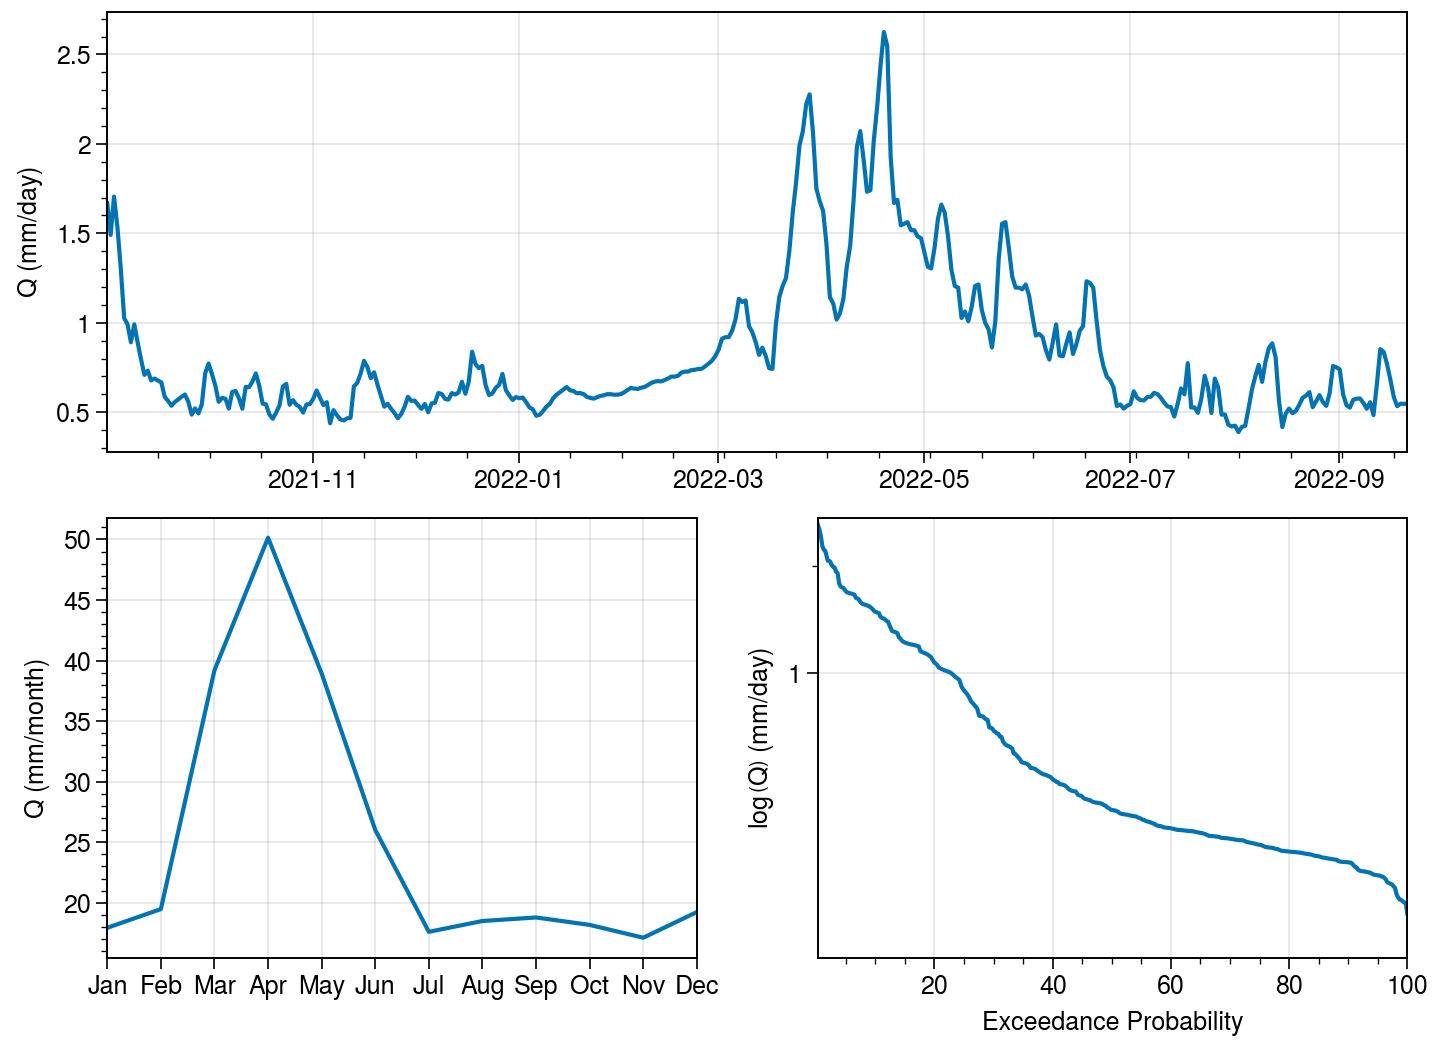

In [32]:
# lets get streamflow data
qobs = nwis.get_streamflow([site,], dates, mmd=True)
print(qobs.head())
gh.plot.signatures(qobs)

### Class Activity 5 - *get data for another gage*
In the blank code block below retrieve discharge data from the **CLEAR CREEK NEAR LAWSON, CO (USGS 06716500)** gage (or another gage of your choosing) and plot it up.

In [33]:
site = "06716500"
dates = ("2021-09-01", "2022-09-22")
nwis = NWIS()
query = {"sites": site}
# get info about the site
info_box = nwis.get_info(query)
qobs = nwis.get_streamflow([site,], dates, mmd=False)
qobs.head()
list(qobs)

['USGS-06716500']

Save the discharge or stage data for the gage you extracted to a csv file. One approach for doing this is:

```python
fname = os.path.join(pthnb, 'ClearCreekNearLawsonQ.csv')
with open(fname, "w") as f:
    for idx in range(qobs['USGS-06716500'].shape[0]):
        f.write(f"{qobs.index[idx]},{qobs['USGS-06716500'][idx]}\n")
```

In [34]:
fname = os.path.join(pthnb, 'ClearCreekNearLawsonQ.csv')
with open(fname, "w") as f:
    for idx in range(qobs['USGS-06716500'].shape[0]):
        f.write(f"{qobs.index[idx]},{qobs['USGS-06716500'][idx]}\n")